In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [4]:
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,0.09,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,0.05,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,0.07,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,0.03,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,0.02,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

**There are no null values in the dataset**

<Axes: >

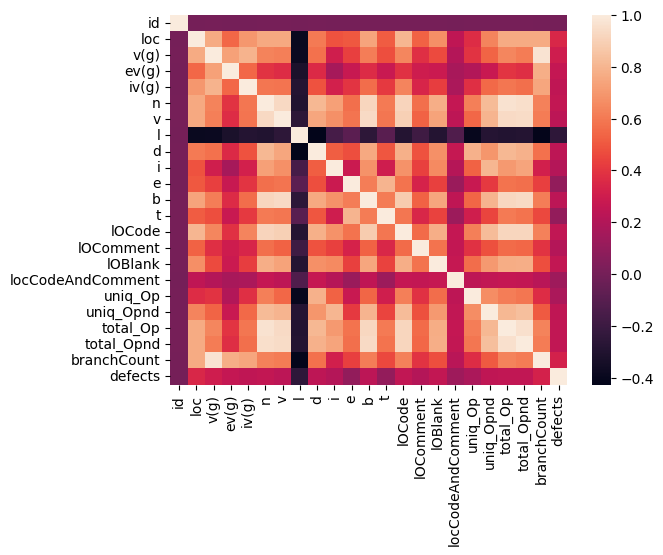

In [6]:
sns.heatmap(df.corr())

### Machine Learning Models

In [7]:
X_train = df.drop(['id', 'defects'], axis=1)
y_train = df.defects

In [8]:
from sklearn.preprocessing import PowerTransformer

# Assuming X is your feature matrix
pt = PowerTransformer(method='yeo-johnson', standardize=False)  # You can also use 'yeo-johnson' if needed
X_log_transformed = pt.fit_transform(X_train)


In [59]:
rf = RandomForestClassifier(n_estimators=400, class_weight={False:0.25, True:0.75}, max_depth=10, max_features=None, random_state=42)
cv_scores = cross_val_score(rf, X_log_transformed, y_train, cv=5, n_jobs=-1, scoring='roc_auc')
print(cv_scores)
print(np.mean(cv_scores))

[0.79202777 0.78709496 0.79292252 0.79150698 0.78540476]
0.789791399126087


In [54]:
rf = RandomForestClassifier(n_estimators=400, class_weight={False: 0.25, True: 0.75}, max_depth=10, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1, scoring='roc_auc')
print(cv_scores)
print(np.mean(cv_scores))

[0.79363122 0.78770043 0.7931875  0.79273566 0.7858056 ]
0.7906120845722773


In [56]:
rf.fit(X_log_transformed, y_train)

RandomForestClassifier(class_weight={False: 0.25, True: 0.75}, max_depth=10,
                       n_estimators=400, random_state=42)

### Submission

In [57]:
X_test = test.drop('id', axis=1)
X_test = pt.transform(X_test)
pd.DataFrame({
    'id': test.id,
    'defects': rf.predict_proba(X_test)[:, 1]
}).to_csv('output/RF_Submission.csv', index=False)

In [ ]:
pd.read_csv('output/submission.csv').defects.mean()

0.22735023062144397